In [20]:
# 필수 라이브러리
import pandas as pd
import numpy as np
import geopandas as gpd
from pathlib import Path

import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'MalgunGothic'
plt.rcParams['axes.unicode_minus'] = False

data_dir = Path("/mnt/c/Source/python/AST-GCN/res")
csv_path  = data_dir / "FINAL_NODE_FEATURES_202510.csv"
gpkg_path = data_dir / "seoul_drive_net.gpkg"


### 서울시 버스 이용량 데이터

In [21]:
node_df = pd.read_csv(csv_path)

# 크기 / 컬럼 / 타입
print(node_df.shape)
node_df.head()

(176520, 6)


,osmid,Hour,TotalTraffic,GetOn,GetOff,RouteCount
0,282723804,0,179.0,116.0,63.0,1.0
1,282723804,1,0.0,0.0,0.0,1.0
2,282723804,2,0.0,0.0,0.0,1.0
3,282723804,3,0.0,0.0,0.0,1.0
4,282723804,4,639.0,61.0,578.0,1.0


In [22]:
# 노드 수, 시간 분포
print("고유 osmid 개수:", node_df["osmid"].nunique())
print("Hour 값:", sorted(node_df["Hour"].unique()))

# 한 노드가 0~23시간을 다 가지고 있는지 확인
rows_per_node = node_df.groupby("osmid")["Hour"].nunique().value_counts().sort_index()
rows_per_node

고유 osmid 개수: 7355
Hour 값: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23]


Hour
24    7355
Name: count, dtype: int64

findfont: Font family 'MalgunGothic' not found.
findfont: Font family 'MalgunGothic' not found.
findfont: Font family 'MalgunGothic' not found.
findfont: Font family 'MalgunGothic' not found.
findfont: Font family 'MalgunGothic' not found.
findfont: Font family 'MalgunGothic' not found.
findfont: Font family 'MalgunGothic' not found.
findfont: Font family 'MalgunGothic' not found.
findfont: Font family 'MalgunGothic' not found.
findfont: Font family 'MalgunGothic' not found.
findfont: Font family 'MalgunGothic' not found.
findfont: Font family 'MalgunGothic' not found.
findfont: Font family 'MalgunGothic' not found.
findfont: Font family 'MalgunGothic' not found.
findfont: Font family 'MalgunGothic' not found.
findfont: Font family 'MalgunGothic' not found.
findfont: Font family 'MalgunGothic' not found.
findfont: Font family 'MalgunGothic' not found.
findfont: Font family 'MalgunGothic' not found.
findfont: Font family 'MalgunGothic' not found.
findfont: Font family 'MalgunGothic' not

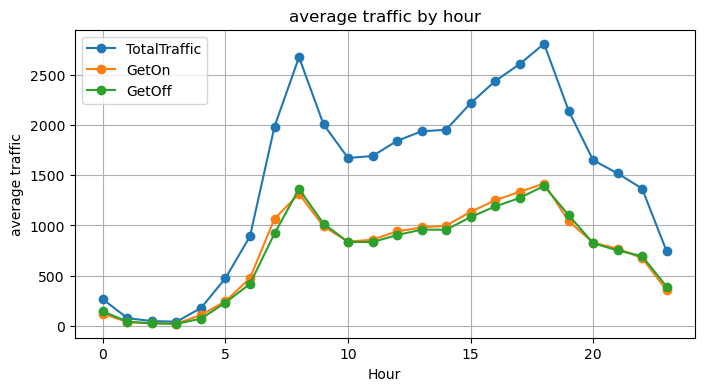

In [23]:
# 전체 시간대 평균 승하차량
hour_stats = node_df.groupby("Hour")[["TotalTraffic","GetOn","GetOff"]].mean()

hour_stats.plot(kind="line", marker="o", figsize=(8,4))
plt.title("average traffic by hour")
plt.ylabel("average traffic")
plt.grid(True)
plt.show()

In [24]:
# 노드별 하루 총 승하차량 (24시간 합)
node_daily = node_df.groupby("osmid")[["TotalTraffic","GetOn","GetOff"]].sum()
node_daily.sort_values("TotalTraffic", ascending=False).head(10)

,TotalTraffic,GetOn,GetOff
osmid,,,
1835967330,1073275.0,453264.0,620011.0
436868004,954686.0,459548.0,495138.0
7062459938,861472.0,434854.0,426618.0
1939144058,799604.0,453149.0,346455.0
13227913200,566935.0,356622.0,210313.0
13049399763,528608.0,265664.0,262944.0
12208571853,519571.0,293344.0,226227.0
732440442,504153.0,285386.0,218767.0
8551941370,474818.0,246602.0,228216.0


findfont: Font family 'MalgunGothic' not found.
findfont: Font family 'MalgunGothic' not found.
findfont: Font family 'MalgunGothic' not found.
findfont: Font family 'MalgunGothic' not found.
findfont: Font family 'MalgunGothic' not found.
findfont: Font family 'MalgunGothic' not found.
findfont: Font family 'MalgunGothic' not found.
findfont: Font family 'MalgunGothic' not found.
findfont: Font family 'MalgunGothic' not found.
findfont: Font family 'MalgunGothic' not found.
findfont: Font family 'MalgunGothic' not found.
findfont: Font family 'MalgunGothic' not found.
findfont: Font family 'MalgunGothic' not found.
findfont: Font family 'MalgunGothic' not found.
findfont: Font family 'MalgunGothic' not found.
findfont: Font family 'MalgunGothic' not found.
findfont: Font family 'MalgunGothic' not found.
findfont: Font family 'MalgunGothic' not found.
findfont: Font family 'MalgunGothic' not found.
findfont: Font family 'MalgunGothic' not found.
findfont: Font family 'MalgunGothic' not

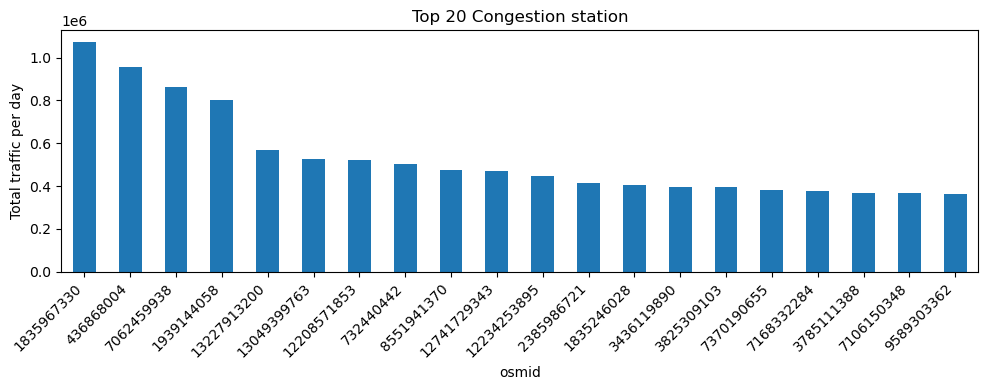

In [35]:
topk = 20
top_nodes = node_daily.sort_values("TotalTraffic", ascending=False).head(topk)

top_nodes["TotalTraffic"].plot(kind="bar", figsize=(10,4))
plt.title(f"Top {topk} Congestion station")
plt.ylabel("Total traffic per day")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()


In [36]:
node_df["RouteCount"].value_counts().sort_index()


RouteCount
1.000000    136536
1.023256        24
1.030303        24
1.040000        96
1.041667       120
             ...  
3.333333        24
3.500000        24
4.000000        96
5.000000        24
6.000000        24
Name: count, Length: 117, dtype: int64

### 서울시 노드 정보 데이터

In [37]:
import fiona
fiona.listlayers(gpkg_path)

['nodes', 'edges']

In [38]:
edges_gdf = gpd.read_file(gpkg_path, layer="edges")
nodes_gdf = gpd.read_file(gpkg_path, layer="nodes")

edges_gdf.head(), edges_gdf.info()
nodes_gdf.head(), nodes_gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 103620 entries, 0 to 103619
Data columns (total 21 columns):
 #   Column    Non-Null Count   Dtype   
---  ------    --------------   -----   
 0   u         103620 non-null  int64   
 1   v         103620 non-null  int64   
 2   key       103620 non-null  int64   
 3   osmid     103620 non-null  object  
 4   highway   103620 non-null  object  
 5   name      103620 non-null  object  
 6   oneway    103620 non-null  bool    
 7   reversed  103620 non-null  object  
 8   length    103620 non-null  float64 
 9   from      103620 non-null  int64   
 10  to        103620 non-null  int64   
 11  lanes     103620 non-null  object  
 12  maxspeed  103620 non-null  object  
 13  ref       103620 non-null  object  
 14  bridge    103620 non-null  object  
 15  tunnel    103620 non-null  object  
 16  junction  103620 non-null  object  
 17  access    103620 non-null  object  
 18  width     103620 non-null  object  
 19  service   10362

(       osmid          y           x  street_count junction highway ref  \
 0  266813237  37.526615  127.000794             3                        
 1  278159482  37.525964  126.997422             3                        
 2  278159676  37.527696  127.002375             3                        
 3  282723724  37.588055  127.023541             3                        
 4  282723780  37.586624  127.025199             3                        
 
   railway                    geometry  
 0          POINT (127.00079 37.52662)  
 1          POINT (126.99742 37.52596)  
 2           POINT (127.00238 37.5277)  
 3          POINT (127.02354 37.58805)  
 4           POINT (127.0252 37.58662)  ,
 None)

In [29]:
# 좌표계 확인 (위경도)
print(edges_gdf.crs)
print(nodes_gdf.crs)

EPSG:4326
EPSG:4326


findfont: Font family 'MalgunGothic' not found.
findfont: Font family 'MalgunGothic' not found.
findfont: Font family 'MalgunGothic' not found.
findfont: Font family 'MalgunGothic' not found.
findfont: Font family 'MalgunGothic' not found.
findfont: Font family 'MalgunGothic' not found.
findfont: Font family 'MalgunGothic' not found.
findfont: Font family 'MalgunGothic' not found.
findfont: Font family 'MalgunGothic' not found.
findfont: Font family 'MalgunGothic' not found.
findfont: Font family 'MalgunGothic' not found.
findfont: Font family 'MalgunGothic' not found.
findfont: Font family 'MalgunGothic' not found.
findfont: Font family 'MalgunGothic' not found.
findfont: Font family 'MalgunGothic' not found.
findfont: Font family 'MalgunGothic' not found.
findfont: Font family 'MalgunGothic' not found.
findfont: Font family 'MalgunGothic' not found.
findfont: Font family 'MalgunGothic' not found.
findfont: Font family 'MalgunGothic' not found.
findfont: Font family 'MalgunGothic' not

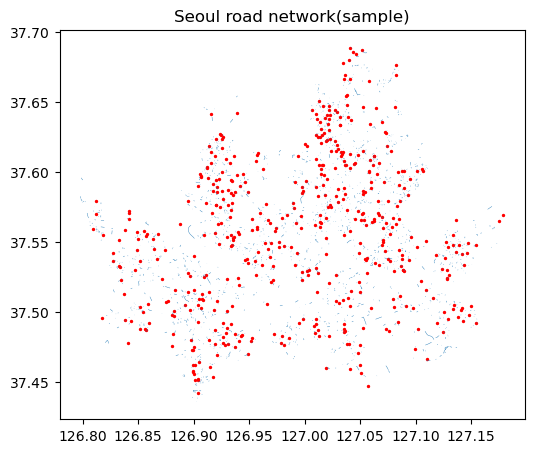

In [39]:
ax = edges_gdf.sample(min(2000, len(edges_gdf))).plot(figsize=(6,6), linewidth=0.3)
nodes_gdf.sample(min(500, len(nodes_gdf))).plot(ax=ax, markersize=2, color="red")
plt.title("Seoul road network(sample)")
plt.show()

### 데이터 조인

In [40]:
nodes_gdf.columns

Index(['osmid', 'y', 'x', 'street_count', 'junction', 'highway', 'ref',
       'railway', 'geometry'],
      dtype='object')

In [41]:
# 노드 좌표만 추출
node_xy = nodes_gdf[["osmid", "geometry"]].copy()

# 시계열 데이터와 merge (각 osmid의 Hour별 데이터가 좌표를 가지게 됨)
node_with_geo = node_df.merge(node_xy, on="osmid", how="left")

node_with_geo["geometry"].isna().mean()  # 좌표 없는 행 비율

node_with_geo

,osmid,Hour,TotalTraffic,GetOn,GetOff,RouteCount,geometry
0,282723804,0,179.0,116.0,63.0,1.0,POINT (127.0253 37.58656)
1,282723804,1,0.0,0.0,0.0,1.0,POINT (127.0253 37.58656)
2,282723804,2,0.0,0.0,0.0,1.0,POINT (127.0253 37.58656)
3,282723804,3,0.0,0.0,0.0,1.0,POINT (127.0253 37.58656)
4,282723804,4,639.0,61.0,578.0,1.0,POINT (127.0253 37.58656)
...,...,...,...,...,...,...,...
176515,13284318372,19,264.0,29.0,235.0,1.0,POINT (127.05534 37.61255)
176516,13284318372,20,106.0,12.0,94.0,1.0,POINT (127.05534 37.61255)
176517,13284318372,21,99.0,12.0,87.0,1.0,POINT (127.05534 37.61255)
176518,13284318372,22,88.0,7.0,81.0,1.0,POINT (127.05534 37.61255)


findfont: Font family 'MalgunGothic' not found.
findfont: Font family 'MalgunGothic' not found.
findfont: Font family 'MalgunGothic' not found.
findfont: Font family 'MalgunGothic' not found.
findfont: Font family 'MalgunGothic' not found.
findfont: Font family 'MalgunGothic' not found.
findfont: Font family 'MalgunGothic' not found.
findfont: Font family 'MalgunGothic' not found.
findfont: Font family 'MalgunGothic' not found.
findfont: Font family 'MalgunGothic' not found.
findfont: Font family 'MalgunGothic' not found.
findfont: Font family 'MalgunGothic' not found.
findfont: Font family 'MalgunGothic' not found.
findfont: Font family 'MalgunGothic' not found.
findfont: Font family 'MalgunGothic' not found.
findfont: Font family 'MalgunGothic' not found.
findfont: Font family 'MalgunGothic' not found.
findfont: Font family 'MalgunGothic' not found.
findfont: Font family 'MalgunGothic' not found.
findfont: Font family 'MalgunGothic' not found.
findfont: Font family 'MalgunGothic' not

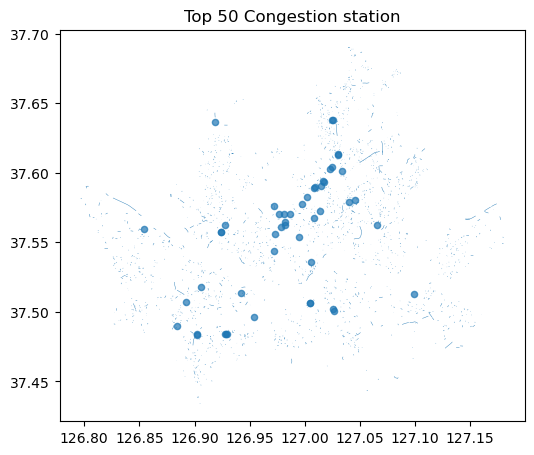

In [42]:
# 지도 위에 가장 바쁜 정류장 찍기 (top 50)

top_nodes_geo = node_with_geo.groupby(["osmid","geometry"])["TotalTraffic"].sum().reset_index()
top_nodes_geo = top_nodes_geo.sort_values("TotalTraffic", ascending=False).head(50)

top_nodes_gdf = gpd.GeoDataFrame(top_nodes_geo, geometry="geometry", crs=nodes_gdf.crs)

ax = edges_gdf.sample(min(2000, len(edges_gdf))).plot(figsize=(6,6), linewidth=0.3)
top_nodes_gdf.plot(ax=ax, markersize=20, alpha=0.7)
plt.title("Top 50 Congestion station")
plt.show()


/home/youngboy/.cache/matplotlib
